### Bayesian Networks and Machine Learning Project
This project demonstrates Knowledge Representation concepts through Bayesian Networks and Naive Bayes classification algorithms.

![](images/header_s2_part1.png)

A passage of text was provided from a lifestyle risk factor and residual life expectancy <a href="https://bmcmedicine.biomedcentral.com/articles/10.1186/1741-7015-12-59">cohort study</a> conducted in Germany published in 2014. The initial step is to produce a visualization of the network structure. It outlines the relationships between the chosen variables from the given text.

### Rationale & Visualization Of The Network:

The implemented variables are:

* "Is A Smoker"
* "Heavy Alcohol Consumption"
* "Is Overweight"
* "Low Physical Activity"
* Health Risk
* Gender (implemented as "Is Female")
* Loss of Residual Life Expectancy (RLE)

The aim is to predict the loss of life expectancy in amount of years depending on the use and habits of lifestyle risk factors and gender. The visual depiction of the network is as follows:

![](images/bayes_network_visualization.png)

Bad lifestyle choices lead to an increased health risk and ultimate decrease in life expectancy. Smoking has the highest health impact followed by overweight, alcohol and no exercise. All of those weigh in on the "Health Risk" in the network.  As the text also indicates: gender is clearly a very important influence besides bad risk factors. Therefore woman and men are affected differently. This is why the variable affects the "RLE Loss" combined with "Health Risk" towards the end. This means that "Gender" is an independant factor as of course none of the health risks themselves influence if the gender is female or male.

Note: the variable "Is a Smoker" is understood to be either a heavy or light smoker in this context for simplification.

Variables that have been omitted from the text are "Low BMI" and "Red Meat Consumption". Nevertheless this omission is being taken into account to some extent when querying the overall loss in years for any scenario as explained later on.

### Conditional Probability Tables:

To obtain more accurate results I have utilized additional census related information where possible. As the original data applies to Germany so does the additional input shown below. At first are the four chosen health risk factors:

![](images/table_1.png)

Those four risks constitute the "Health Risk" probabiliy table. All values have been approximated by calculation as explained. The text outlines a "maximum loss of life in years" value for heavy and light female and male smokers. Those are respectively 9.4 and 7.3 as well as 5.3 and 5.0. In order to combine them I chose to use the average of those between heavy and light as well as between male and female (equals 6.75 years). This is only an approximate solution to combine those values into one united "smoking" value.

When summing the respective year amounts for the four chosen risk factors (smoking = 6.75, alcohol = 3.1, overweight = 3.15 and low PA = 1.1) each value's respective percentage of the total sum can be dertermined and normalized to 1. The last step is to find the correct distribution. For example smoking with an original value of 6.75 years is now 0.523 (0 to 1 scale) by itself with 1 being all four health risk factors summed. The resulting table looks as follows:

![](images/table_2.png)

The remaining tables are the Gender "Is Female" table (based on German census data) and the combined RLE Loss table.

![](images/table_3.png)

![](images/table_4.png)

In order to compensate somewhat for the dropped "Low BMI" and "Red Meat" values, the RLE Loss is calculated with keeping the new maximum in mind. In the text the values 17 (for men) and 13.9 (for woman) are indicated. Those include the here omitted health risks. The new maximum values (with only four health risks) respectively are between 15 to 16 for male and 13 for female.

Because the "smoking" values have also been combined in an average, the calculation are to be expected slightly lower for male and slightly higher for female. Those will be tested and compared to the text in the next section to find out any deviations. Either way the RLE Loss values could always be adapted slightly if required but are based on my own calculations as indicated.

### Implementation & Querying The Network:

All of the above outlined is implemented in a BayesNet as can be seen below:

![](images/code_1.png)

In [ ]:
from bayes_network_rle import get_RLE_bayes_network
from lib_aima.probability import enumeration_ask, likelihood_weighting

##### First get the network and check if a node conditional probablility table returns values

In [14]:
network = get_RLE_bayes_network()
network.variable_node('Health_Risk').cpt

{(True, True, True, True): 0.999,
 (True, True, True, False): 0.898,
 (True, True, False, True): 0.81,
 (True, True, False, False): 0.708,
 (True, False, True, True): 0.815,
 (True, False, True, False): 0.713,
 (True, False, False, True): 0.625,
 (True, False, False, False): 0.523,
 (False, True, True, True): 0.477,
 (False, True, True, False): 0.375,
 (False, True, False, True): 0.287,
 (False, True, False, False): 0.185,
 (False, False, True, True): 0.292,
 (False, False, True, False): 0.19,
 (False, False, False, True): 0.102,
 (False, False, False, False): 0.001}

##### Get an accurate return with "enumerate_ask"
This can also function as a test as one knows what to expect based on the parameters. For the query below 0.9411 is expected.

In [18]:
query = enumeration_ask('RLE_Loss', {'Health_Risk': True, 'Is_Female': False}, network)
query[True]

0.9410999999999999

The value is correct.

##### Using "likelihood_weighting" to obtain an estimate of probability
As documented in the aima code base this function will return "estimate of probability distribution of X given e". Below I query values that were initially provided in the text in order to compare the networks performance. 

According to the text a male heavy smoker may have a 9.4 (between 8.3-10.6) years reduction in life expectancy. For females the value is 5.3 (3.6 - 7.1). In order to obtain the year-values, the output from the network needs to be mulitplied with the given maximum of 17 or respectively 13.9 years.

In [23]:
# setting up the max variables for easier reference
female_max = 13.9
male_max = 17

In [24]:
# male calculations
query = likelihood_weighting('RLE_Loss', {'Is_Smoker': True, 'Is_Heavy_Drinker': False, 'Is_Overweight': False, 'Low_Physical_Acitivity': False, 'Is_Female': False}, network)
print("Potential RLE Loss in number of years:", round(query[True]*male_max,2))

Potential RLE Loss in number of years: 8.65


In [25]:
# female calculations
query = likelihood_weighting('RLE_Loss', {'Is_Smoker': True, 'Is_Heavy_Drinker': False, 'Is_Overweight': False, 'Low_Physical_Acitivity': False, 'Is_Female': True}, network)
print("Potential RLE Loss in number of years:", round(query[True]*female_max,2))

Potential RLE Loss in number of years: 6.01


As previously mentioned the expected values for female would be a bit higher and for male a bit lower than what given in the text due to some of the simplifications and averaging. However they are still well within the threshold. This means the **network is performing correct**. 

Nevertheless all returned values need to be interpreted within a **range of at least +/-1 years**.

#### Asking More Questions

How many years of reduced life expectancy can a smoker that is overweight, rarely exercises and regularily drinks expect? For a male:

In [38]:
query = likelihood_weighting('RLE_Loss', {'Is_Smoker': True, 'Is_Heavy_Drinker': True, 'Is_Overweight': True, 'Low_Physical_Acitivity': True, 'Is_Female': False}, network)
print("Potential RLE Loss in number of years:", round(query[True]*male_max,2))

Potential RLE Loss in number of years: 15.91


And for a female:

In [39]:
query = likelihood_weighting('RLE_Loss', {'Is_Smoker': True, 'Is_Heavy_Drinker': True, 'Is_Overweight': True, 'Low_Physical_Acitivity': True, 'Is_Female': True}, network)
print("Potential RLE Loss in number of years:", round(query[True]*female_max,2))

Potential RLE Loss in number of years: 10.73


How does the same compare if one isn't a smoker though? For a male:

In [40]:
query = likelihood_weighting('RLE_Loss', {'Is_Smoker': False, 'Is_Heavy_Drinker': True, 'Is_Overweight': True, 'Low_Physical_Acitivity': True, 'Is_Female': False}, network)
print("Potential RLE Loss in number of years:", round(query[True]*male_max,2))

Potential RLE Loss in number of years: 7.86


And for females:

In [44]:
query = likelihood_weighting('RLE_Loss', {'Is_Smoker': False, 'Is_Heavy_Drinker': True, 'Is_Overweight': True, 'Low_Physical_Acitivity': True, 'Is_Female': True}, network)
print("Potential RLE Loss in number of years:", round(query[True]*female_max,2))

Potential RLE Loss in number of years: 5.6


It is evident that smoking can have a very high impact on RLE reduction. More so than any other negative lifestyle choice included in the study.

But of course, we all live very healthily. We ony smoke occasionally, drink a bit for fun on weekends, go for a run (sometimes) and are only a bit overweight. *Surely we are fine!* What is the loss in life expectancy estimated when **only RLE Loss is queried** (default mode)?

In [47]:
query = likelihood_weighting('RLE_Loss', {}, network)
print("Potential RLE Loss (Male) in number of years:", round(query[True]*male_max,2))
print("Potential RLE Loss (Female) in number of years:", round(query[True]*female_max,2))

Potential RLE Loss (Male) in number of years: 4.54
Potential RLE Loss (Female) in number of years: 3.71


### Uh oh ?!

![](images/panic.png)

Ok then... and for the *super healthy* so, that exercise, don't smoke, don't drink and aren't overweight?

In [50]:
query = likelihood_weighting('RLE_Loss', {'Is_Smoker': False, 'Is_Heavy_Drinker': False, 'Is_Overweight': False, 'Low_Physical_Acitivity': False, 'Is_Female': True}, network)
print("Potential RLE Loss (Male) in number of years:", round(query[True]*male_max,2))
print("Potential RLE Loss (Female) in number of years:", round(query[True]*female_max,2))

Potential RLE Loss (Male) in number of years: 1.09
Potential RLE Loss (Female) in number of years: 0.9


Right, that's better. Looks like it is a good idea to start exercising a bit more and avoiding bad lifestyle choices.

![](images/header_s2_part2.png)

The task is to **choose one multivariate dataset** from the <a href ="https://archive.ics.uci.edu/ml/index.php"> UCI Machine Learning Repository</a> and (1) perform various computations on it and (2) implement the **Naive Bayes Learner** algorithm based on the AIMA code repository and evaluate its performance.

# 2.1 Data

Importing other required libraries first:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

from lib import settings

In [2]:
#######################################
# VARIOUS SETTINGS / PARAMS 
#######################################

# INIT SETTINGS

display_output = True # allows for print outs of various dicts below (default should be True)
settings.init_settings(show_output=display_output)

# PLOT DISPLAY CSS
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    border: 4px solid #6b89a6; /* my header color */
    margin: 40px 200px; /* compress down a bit */
}
</style>
""")

#### Get Data / Process

Mushroom Dataset
Division into poisonous and edible

![](images/mushrooms.png)

In [ ]:
from naive_bayes_classifier import read_in_dataFrame

In [4]:
run_from_notebook = True
file = "./data/agaricus-lepiota.data"
class_header_label = 'class'
column_headers = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 
                  'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
                  'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
                  'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
                  'population', 'habitat'
                  ]

In [5]:
data_frame = read_in_dataFrame(file, column_names=column_headers)
display_to = 10
data_frame[:display_to]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


#### Data Subset

While the 8000+ records in the original data file display a relatively even distribution of 'edible' and 'poisonous', large parts of the same class are often clustered together. For that reason any subest needs to be a shuffled set from the entire set to insure a more even distribution.

In [ ]:
from naive_bayes_classifier import get_subset_random_shuffled

![](images/code_2_1.png)

In [7]:
subset_amount = 500 # 8124 max
subset_data = get_subset_random_shuffled(data_frame, subset_amount)

#### Calculate Prior Probabilities

The prior probability is the probability of each class in respect to the entire list of given data rows. In basic terms it can be expressed as the percentage of that class occurance in the given data. It does not take any of the features (or evidence) into account. It can also be expressed as P(c) which means: *prior probability of class c*.

In [ ]:
from naive_bayes_classifier import calculate_prior_class_probabilities

![](images/code_3.png)

In [9]:
prior_prob_dict = calculate_prior_class_probabilities(subset_data)

For class: p the prior probability is: 0.478
For class: e the prior probability is: 0.522


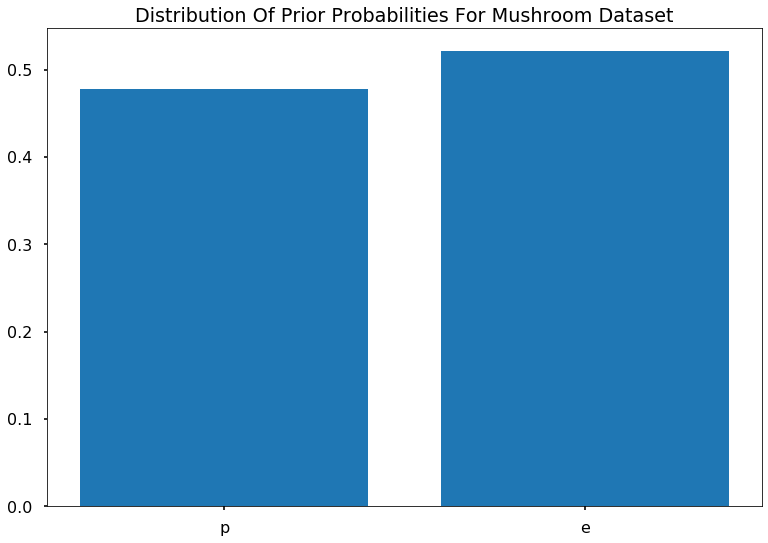

In [10]:
plt.title('Distribution Of Prior Probabilities For Mushroom Dataset')
plt.bar(prior_prob_dict.keys(), prior_prob_dict.values())
plt.show();

#### Calculate Probability of Evidence

The evidence probability refers to the probability of the features (or observed class predictors). In Bayes Theorem the probability of evidence functions as a normalization factor. It is the denominator in the Naive Bayes equation.

In [ ]:
from naive_bayes_classifier import calculate_evidence_probabilities

![](images/code_4_1.png)

In [12]:
evidence_prob_dict = calculate_evidence_probabilities(subset_data)

The probabilities of evidence for the given subset data are as follows:

{'bruises': {'f': 0.604, 't': 0.396},
 'cap-color': {'b': 0.016,
               'c': 0.004,
               'e': 0.188,
               'g': 0.24,
               'n': 0.288,
               'p': 0.016,
               'u': 0.006,
               'w': 0.122,
               'y': 0.12},
 'cap-shape': {'b': 0.064,
               'c': 0.002,
               'f': 0.362,
               'k': 0.11,
               's': 0.002,
               'x': 0.46},
 'cap-surface': {'f': 0.298, 's': 0.32, 'y': 0.382},
 'gill-attachment': {'a': 0.022, 'f': 0.978},
 'gill-color': {'b': 0.214,
                'e': 0.008,
                'g': 0.096,
                'h': 0.106,
                'k': 0.058,
                'n': 0.132,
                'o': 0.006,
                'p': 0.176,
                'r': 0.004,
                'u': 0.052,
                'w': 0.142,
                'y': 0.006},
 'gill-size': {'b': 0.68, 'n': 0.32},
 'gill-spaci

#### Calculate Probability of Likelihood of Evidences

As defined in the Bayes Theorem the likelihood of evidences (*the likelihood*) is defined as **P(E|H)**. That is: the probability of evidence given the hyphothesis (or here more commonly the "class"). In other words this expression defines a conditional probability where the class influences the *expectation* of the evidence.

As previous, I have implemented a function that calculates the likelihood and outputs it as can be seen below.

In [ ]:
from naive_bayes_classifier import calculate_probability_of_likelihood_of_evidences

![](images/code_5.png)

In [14]:
likelihood_dict = calculate_probability_of_likelihood_of_evidences(subset_data)

The probabilities of likelihood of evidence for the given subset data are as follows:

{'e': {'bruises_f': 0.39080459770114945,
       'bruises_t': 0.6091954022988506,
       'cap-color_b': 0.007662835249042145,
       'cap-color_c': 0.0,
       'cap-color_e': 0.16475095785440613,
       'cap-color_g': 0.26436781609195403,
       'cap-color_n': 0.2835249042145594,
       'cap-color_p': 0.007662835249042145,
       'cap-color_u': 0.011494252873563218,
       'cap-color_w': 0.16475095785440613,
       'cap-color_y': 0.09578544061302682,
       'cap-shape_b': 0.10727969348659004,
       'cap-shape_c': 0.0,
       'cap-shape_f': 0.3524904214559387,
       'cap-shape_k': 0.038314176245210725,
       'cap-shape_s': 0.0038314176245210726,
       'cap-shape_x': 0.49808429118773945,
       'cap-surface_f': 0.4061302681992337,
       'cap-surface_s': 0.24521072796934865,
       'cap-surface_y': 0.3486590038314176,
       'gill-attachment_a': 0.034482758620689655,
       'gill-attachment_f': 0.96

#### Application & Suitability

The Bayes Rule explains probabilistic variables (queries) based on prior knowledge related to the variables (inter-dependency). In a network those are depicted as nodes forming a graph. They are only interdependant when connected via edges in the graph (parent-child relationship). Otherwise they are considered conditionally independant.

There are over 8000 feature vectors in this dataset with an almost even distribution of classes among them. The features contain non-numeric values making scaling pre-processing unnecessary. The assumption is, that this dataset should be extremly well suited to implement with a Naive Bayes Learner allowing for effective training with high results as well as 'healthy' splitting into test and train sets.

# 2.2 Naive Bayes Learner

The previously implemented functions provide a foundation to the implementation of a Naive Bayes algorithm. I have slightly modified the previous code as a continuation from task 2.1 and implemented additional changes. Those are  packaged into an own class as shown below. It outlines a basic manual version of a Naive Bayes Learner algorithm.

**Please Note:** *Some recommended practices covered in the Machine Learning module COMP9061 are implemented here. The approach usually entails the use of the fit() and predict() functions with test and train split data. Additional ease-of-use analytical methods (e.g. Confusion Matrix, etc.) are packaged in the SKLearn library. However it is assumed that a manual implementation is required for the assignment. Therefore the required code is custom implemented and any additional libraries here are used for comparison and evaluation only.*

#### Splitting the Data Into a Train & Test Set

In [ ]:
from naive_bayes_classifier import get_train_test_split_data

![](images/code_6.png)

The get_train_test_split_data function has a 'shuffle' flag in the event of clustered data in the data frame. If enabled it will return different values from the data frame at every run. The percentage test split allows for the specification of ratio between train & test data.

In [16]:
train_set, test_set = get_train_test_split_data(data_frame, percentage_train_split=0.90, shuffle=True)

#### Custom Naive Bayes Class
As introductory mentioned the previous functions are packaged into a class with further modifications and an implemented fit and predict class.

In [18]:
from lib.custom_naive_bayes_learner import NaiveBayesLearner

![](images/code_7.png)

I use the training set and the fit function to fit the training data and calculate probabilities.

In [22]:
NBL = NaiveBayesLearner(train_set)
NBL.fit_data()

The predict function is then used to predict the class for every incoming feature vector (code excerpt below).

![](images/code_8_1.png)

In [23]:
# GET PREDICTIONS
predicted_classes = []
true_classes = test_set[class_header_label].tolist()

# cycle through each row in the test set
for index, row in test_set.iterrows():

    feature_row = {} # placholder dict

    # go through each header name
    for header_name in column_headers:
        # avoid class label
        if header_name is not class_header_label:

            # build the dict with each key = header name and value = value of current row
            feature_row[header_name] = row[header_name]            

    #predicted_class, prediction_percentages = NBL.predict_(feature_row)
    predicted_class = NBL.predict_class_from_features(feature_row)
    predicted_classes.append(predicted_class)

From that the accuracy can now be predicted (comparing the true test labels vs. the predicted test labels).

In [25]:
# predict the accuracy
accuracy_counter = 0
for i in range(len(predicted_classes)):
    if predicted_classes[i] == true_classes[i]:
        accuracy_counter += 1

print("The Accuracy of the Test Set is:", accuracy_counter / len(predicted_classes))

The Accuracy of the Test Set is: 0.997539975399754


In this basic implementation the shuffle data option may impact the final accuracy. However with testing several iterations it usually has an accuracy of >90%. In the event of lower accuracy a confusion matrix can shed light if a single class is primarily predicted wrong or if predictions are even across the board. As mentioned the SKLearn library offers various analysis tools including a confusion matrix:

In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(predicted_classes, true_classes)
conf_matrix

array([[411,   2],
       [  0, 400]], dtype=int64)

![](images/mushroom_safe.png)
#### Mushroom Prediction
In this example it shows that two predictions were wrong. That indicates that the likelihood of survival when planning on eating a predicted edible mushroom seems.... quite high.